# Metehan Ayhan - Computer Vision with Deep Learning 

In [3]:
import tensorflow as tf

In [4]:
mnist=tf.keras.datasets.mnist # el yazması rakamları tanıma

In [5]:
(train_images,train_labels),(test_images,test_labels)=mnist.load_data()

In [6]:
train_images.shape

(60000, 28, 28)

In [7]:
import matplotlib.pyplot as plt

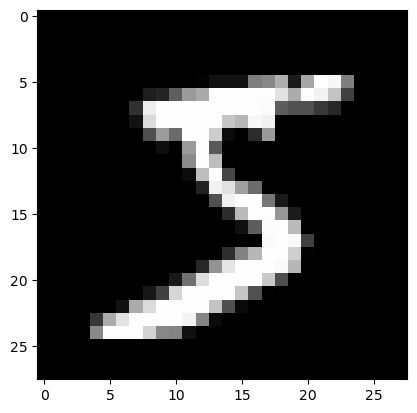

In [8]:
plt.imshow(train_images[0],cmap='gray')

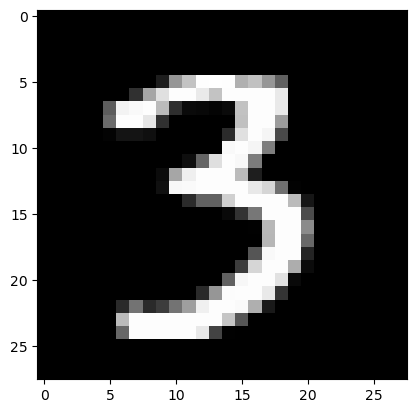

In [9]:
plt.imshow(train_images[10000],cmap='gray')

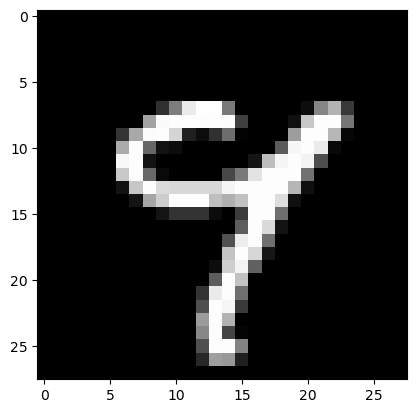

In [10]:
plt.imshow(train_images[54],cmap='gray')

In [11]:
train_labels[54]

9

In [12]:
test_images.shape

(10000, 28, 28)

In [13]:
train_images[54]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  

In [14]:
#datayı normalize edelim.

In [15]:
train_images=train_images/255.0
test_images=test_images/255.0 #0 1 arasına indirgemek için resmin alabileceği en büyük değere bölüyoruz..(rgb:0-255)

<img src=https://cdn.educba.com/academy/wp-content/uploads/2019/05/Normalization-Formula.jpg width=400>

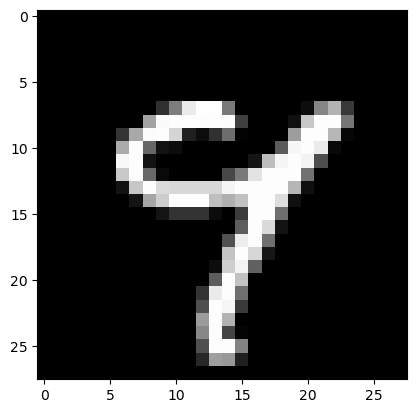

In [17]:
plt.imshow(train_images[54],cmap='gray') #normalize etmek resmi değiştirmez.

## Convolutional Neural Networks - CNNs - Image Classification (Resim Sınıflandırma)

In [19]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, InputLayer, Reshape, MaxPooling2D, Flatten

In [20]:
#build model
model = Sequential()
model.add(InputLayer(input_shape=(28,28))) #test_images.shape

model.add(Reshape(target_shape=(28,28,1))) 

model.add(Conv2D(filters= 12, kernel_size=(3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Flatten())
model.add(Dense(10)) #10 fakLi cevap classification 0-9 a kadar olan rakamlar
model.compile(optimizer= 'adam', loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True), metrics=["accuracy"])

C:\Users\metehan\AppData\Roaming\Python\Python312\site-packages\keras\src\layers\core\input_layer.py:26: UserWarning: Argument `input_shape` is deprecated. Use `shape` instead.
  warnings.warn(


In [21]:
model.fit(train_images,train_labels,validation_split=.1,epochs=10)

Epoch 1/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 13s 6ms/step - accuracy: 0.8483 - loss: 0.5327 - val_accuracy: 0.9662 - val_loss: 0.1224
Epoch 2/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 9s 6ms/step - accuracy: 0.9639 - loss: 0.1269 - val_accuracy: 0.9805 - val_loss: 0.0803
Epoch 3/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 9s 6ms/step - accuracy: 0.9758 - loss: 0.0862 - val_accuracy: 0.9825 - val_loss: 0.0678
Epoch 4/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 9s 6ms/step - accuracy: 0.9803 - loss: 0.0694 - val_accuracy: 0.9832 - val_loss: 0.0640
Epoch 5/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 10s 6ms/step - accuracy: 0.9831 - loss: 0.0579 - val_accuracy: 0.9832 - val_loss: 0.0608
Epoch 6/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 10s 6ms/step - accuracy: 0.9853 - loss: 0.0513 - val_accuracy: 0.9847 - val_loss: 0.0579
Epoch 7/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 10s 6ms/step - accuracy: 0.9869 - loss: 0.0457 - val_accuracy: 0.9828 - val_loss: 0.0598
Epoch 8/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 10s 6ms/step - accuracy: 0.9872 - loss: 0.04

In [22]:
loss,accuracy = model.evaluate(test_images,test_labels)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.9784 - loss: 0.0714


In [23]:
accuracy

0.9818000197410583

In [24]:
model.save("mymodel.h5")

### Increasing accuracy
1- Increase Layers number
2- Increase Neurons number
3- Dropout: cancellation of Overfitting and better understanding
4- Batch Normalization: Normalize the inputs to accelerate training and reduce the sensitivity to initial learning rates


In [27]:
model = Sequential()
model.add(InputLayer(input_shape=(28,28))) 
model.add(Reshape(target_shape=(28, 28, 1)))
model.add(Conv2D(filters= 12, kernel_size=(3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Flatten())
model.add(Dense(60))
model.add(Dense(10)) # different 10 answers
model.compile(optimizer= 'adam', loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True), metrics=["accuracy"])